In [4]:
from matscidata import MatSciDataset
import numpy as np
from matplotlib import pyplot as plt
import os
from models.checkers import p2_fn
import h5py

In [5]:
ds = MatSciDataset(data_path='./datasets/matsci/morph_global_64_valid_255.h5')

In [6]:
p2s = []

In [7]:
for idx, i in enumerate(ds):
    p2s.append(p2_fn(i.unsqueeze(0).cuda()))
    if idx == 5000:
        break

In [14]:
import torch

In [17]:
gen = torch.load('model_outputs_p2_2/generator.pt')

In [25]:
n = torch.randn((1,128)).cuda()

In [20]:
p2_curve = p2s[40]

In [22]:
gen = gen.cuda()

In [27]:
g=gen(n, p2_curve)

In [29]:
g_img = g.reshape(64,64)

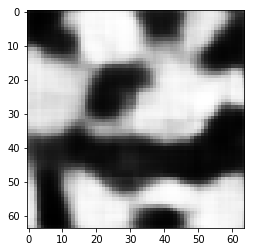

In [31]:
plt.imshow(g_img.detach().cpu().numpy(), cmap='gray')

In [41]:
import pickle as pkl

In [123]:
with open('outputs_p2_2/stats.pkl', 'rb') as f:
    output_dict = pkl.load(f)

In [124]:
orig_p2s = output_dict['p1']
gen_p2s = output_dict['g_p1']
diffs = output_dict['diffs']

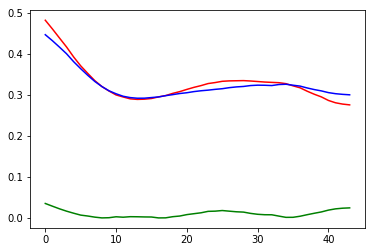

In [125]:
plt.plot(orig_p2s[12][0,:], color='red')
plt.plot(gen_p2s[12][0,:], color='blue')
plt.plot(diffs[12][0,:], color='green')

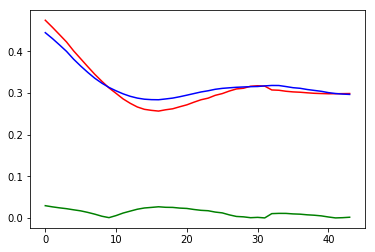

In [126]:
plt.plot(orig_p2s[25][0,:], color='red')
plt.plot(gen_p2s[25][0,:], color='blue')
plt.plot(diffs[25][0,:], color='green')

In [127]:
diffs_np = np.array([i[0,:] for i in diffs])

In [128]:
import seaborn as sns
import pandas as pd

In [129]:
diff_pd = pd.DataFrame(diffs_np)

In [130]:
mean = diff_pd.mean(axis=0)
std = diff_pd.std(axis=0)

Text(0, 0.5, '$p_{2_g} - p_{2_i}$')

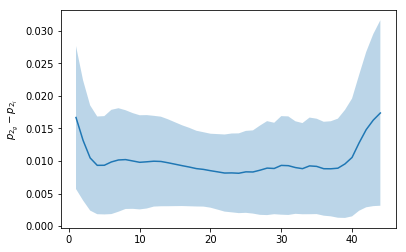

In [134]:
plt.plot(np.arange(1,45), mean)
plt.fill_between(np.arange(1,45), np.array(mean-std), np.array(mean+std), alpha=0.3)
plt.ylabel('$p_{2_g} - p_{2_i}$')

In [151]:
orig_p2s_np = [i[0,:] for i in orig_p2s]
norm_diffs = diffs_np/np.array(orig_p2s_np)

In [152]:
norm_mean = norm_diffs.mean(axis=0)
norm_std = norm_diffs.std(axis=0)

Text(0, 0.5, '$|p_{2_g} - p_{2_i}|/p_{2_g}$')

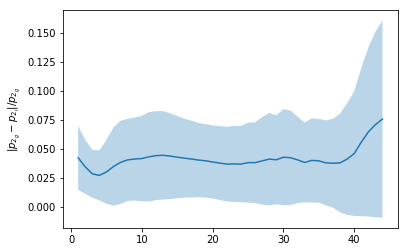

In [155]:
plt.plot(np.arange(1,45), norm_mean)
plt.fill_between(np.arange(1,45), np.array(norm_mean-norm_std), np.array(norm_mean+norm_std), alpha=0.3)
plt.ylabel('$|p_{2_g} - p_{2_i}|/p_{2_g}$')